In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
banana=pd.read_excel('C:\\Users\\noosh\\Documents\\Custom Office Templates\\fruit_banana.xltx')

In [3]:
banana.head()

,Year2,U.S. population of the year,Supply,Imports,Total supply,Exports,Shipments to US territories,Food disappearance Total,Food disappearance per capita in pounds
0,1970,205.052,5.6,3558.3,3563.9,NaN,NaN,3563.9,17.4
1,1971,207.661,4.7,3745.1,3749.8,NaN,NaN,3749.8,18.1
2,1972,209.896,5.1,3756.7,3761.8,NaN,NaN,3761.8,17.9
3,1973,211.909,6.6,3842.0,3848.6,NaN,NaN,3848.6,18.2
4,1974,213.854,6.6,3949.1,3955.7,1.4,NaN,3954.3,18.5


In [4]:
banana.dtypes

Year2                                        int64
U.S. population of the year                float64
Supply                                     float64
Imports                                    float64
Total supply                               float64
Exports                                    float64
Shipments to US territories                float64
Food disappearance Total                   float64
Food disappearance per capita in pounds    float64
dtype: object

In [5]:
banana.rename(columns={'U.S. population of the year':'U.S_population','Total supply':'Total_supply','Shipments to US territories':'Shipments','Food disappearance Total':'Food_disappearance_Total','Food disappearance per capita in pounds':'Food_disappearance_per_capita'},inplace=True)

In [6]:
banana.head()

,Year2,U.S_population,Supply,Imports,Total_supply,Exports,Shipments,Food_disappearance_Total,Food_disappearance_per_capita
0,1970,205.052,5.6,3558.3,3563.9,NaN,NaN,3563.9,17.4
1,1971,207.661,4.7,3745.1,3749.8,NaN,NaN,3749.8,18.1
2,1972,209.896,5.1,3756.7,3761.8,NaN,NaN,3761.8,17.9
3,1973,211.909,6.6,3842.0,3848.6,NaN,NaN,3848.6,18.2
4,1974,213.854,6.6,3949.1,3955.7,1.4,NaN,3954.3,18.5


In [7]:
banana.drop('Shipments',axis=1,inplace=True)

In [8]:
banana.fillna(banana.mean(),inplace=True)

In [9]:
banana.dtypes

Year2                              int64
U.S_population                   float64
Supply                           float64
Imports                          float64
Total_supply                     float64
Exports                          float64
Food_disappearance_Total         float64
Food_disappearance_per_capita    float64
dtype: object

In [10]:
from sklearn import preprocessing

In [11]:
le=preprocessing.LabelEncoder()
for Imports in banana:
    if banana[Imports].dtype==object:
        banana[Imports]=le.fit_transform(banana[Imports])
    else:
        pass

In [12]:
banana.dtypes

Year2                              int64
U.S_population                   float64
Supply                           float64
Imports                          float64
Total_supply                     float64
Exports                          float64
Food_disappearance_Total         float64
Food_disappearance_per_capita    float64
dtype: object

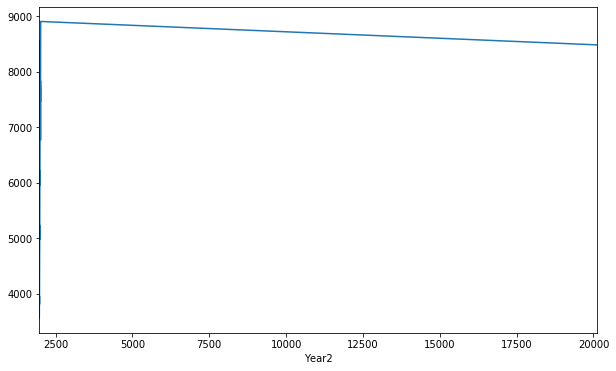

In [13]:
banana.groupby('Year2').Food_disappearance_Total.mean().plot(kind="line",figsize=(10,6))

C:\Users\noosh\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


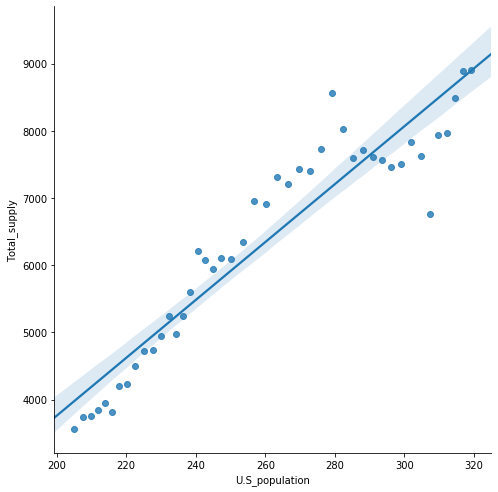

In [14]:
sns.pairplot(banana,x_vars=['U.S_population'],y_vars=['Total_supply'],size=7,kind='reg')

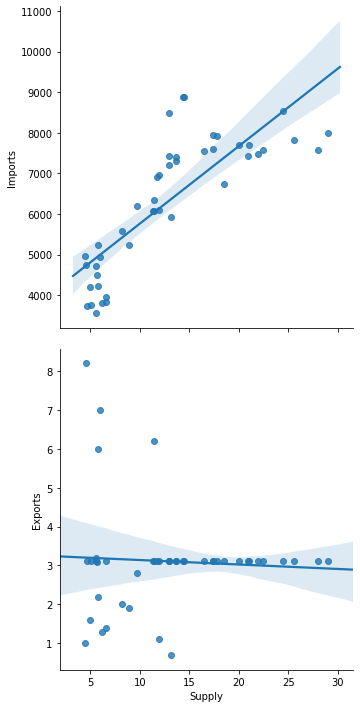

In [15]:
sns.pairplot(banana,x_vars=['Supply'],y_vars=['Imports','Exports'],size=5,kind='reg')

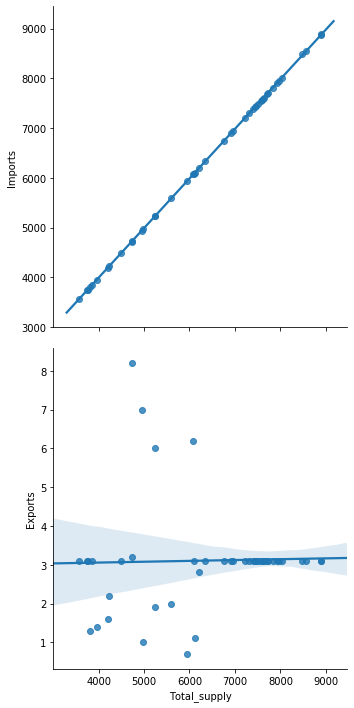

In [16]:
sns.pairplot(banana,x_vars=['Total_supply'],y_vars=['Imports','Exports'],size=5,kind='reg')

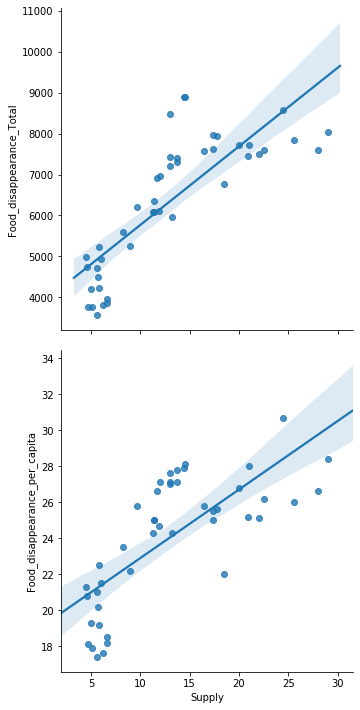

In [17]:
sns.pairplot(banana,x_vars=['Supply'],y_vars=['Food_disappearance_Total','Food_disappearance_per_capita'],size=5,kind='reg')

In [18]:
feature_cols=['U.S_population','Imports','Total_supply','Food_disappearance_Total','Supply']

In [19]:
x=banana[feature_cols]

In [20]:
y=banana['Food_disappearance_per_capita'].astype('int')

In [21]:
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, r2_score

In [22]:
SEED=1

In [23]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=SEED)

In [24]:
gbt=GradientBoostingRegressor(n_estimators=500,max_depth=1,random_state=SEED)

In [25]:
gbt.fit(x_train,y_train)

GradientBoostingRegressor(max_depth=1, n_estimators=500, random_state=1)

In [26]:
y_pred=gbt.predict(x_test)

In [27]:
rmse_test=MSE(y_test,y_pred)**(1/2)

In [28]:
mse = MSE(y_test, y_pred)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, y_pred)
print("R2:", r2)

MSE: 0.980417881661819
RMSE: 0.9901605332782251
R2: 0.8955641821708062


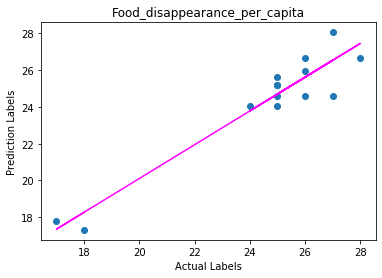

In [29]:
# Plot predicted vs actual
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Labels')
plt.ylabel('Prediction Labels')
plt.title('Food_disappearance_per_capita')
# overlay the regression line
z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()